### 패키지 선언

In [2]:
import torch
import torch.nn as nn
import torchvision.datasets as dataset
import torchvision.transforms as transform
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

## Dataset 다운로드

In [3]:
# Training dataset 다운로드
cifar10_train = dataset.CIFAR10(root = "./",
                            train = True,
                            transform = transform.ToTensor(),
                            download = True)
# Testing dataset 다운로드
cifar10_test = dataset.CIFAR10(root = "./",
                            train = False,
                            transform = transform.ToTensor(),
                            download = True)

dataLabel = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Files already downloaded and verified
Files already downloaded and verified


## LeNet5 모델 정의
- Fully Connected Layer -> nn.Linear(in_features, out_features)
- Convolutional Layer -> nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding)
- ReLU -> nn.ReLU()
- Max Pooling -> nn.MaxPool2d(kernel_size, stride)


In [6]:
class VGG(nn.Module):

  def __init__(self):
    super(VGG, self).__init__()
    # 신경망 파라미터 초기화 (Conv 2개, FC 3개, ReLU, MaxPool)
    self.conv1 =nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, stride=1, padding=1)
    self.relu = nn.ReLU()
    self.conv1 =nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
    self.relu = nn.ReLU()
    self.AvgPool2d = nn.AvgPool2d(kernel_size=2, stride=2)
    
    self.conv1 =nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1)
    self.relu = nn.ReLU()
    self.conv1 =nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, stride=1, padding=1)
    self.relu = nn.ReLU()
    self.AvgPool2d = nn.AvgPool2d(kernel_size=2, stride=2)
    
    self.conv1 =nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1)
    self.relu = nn.ReLU()
    self.conv1 =nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1)
    self.relu = nn.ReLU()
    self.AvgPool2d = nn.AvgPool2d(kernel_size=2, stride=2)
    
    
    
    self.conv2 =nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1)
    
    self.fc1 = nn.Linear(in_features=512,out_features=256)
    self.fc2 = nn.Linear(in_features=256,out_features=256)
    self.fc3 = nn.Linear(in_features=256,out_features=10)

  def forward(self, x):
    #-----------------------------------------------------------------
    # Convolution, MaxPool layer 추가 필요 (발표 자료 중 1~6번)
    y = self.conv1(x)
    y = self.relu(y)
    y = self.AvgPool2d(y)
    
    y = self.conv2(y)
    y = self.relu(y)
    y = self.AvgPool2d(y)
    
    y = self.conv2(y)
    y = self.relu(y)
    y = self.AvgPool2d(y)
    #-----------------------------------------------------------------

    y = y.view(-1, 400) # feature map 평탄화

    #-----------------------------------------------------------------
    # Fully Connected layer 추가 필요 (발표 자료 중 8~12번)
    y= self.fc1(y)
    y =self.relu(y)
    
    y = self.fc2(y)
    y = self.relu(y)
    
    y = self.fc3(y)   
    #-----------------------------------------------------------------

    return y


## Hyper-parameters 지정

In [7]:
batch_size = 100
learning_rate = 0.1
training_epochs = 15
loss_function = nn.CrossEntropyLoss()
network = VGG()
optimizer = torch.optim.SGD(network.parameters(), lr = learning_rate)

data_loader = DataLoader(dataset=cifar10_train,
                         batch_size=batch_size,
                         shuffle=True,
                         drop_last=True)

## CNN 학습을 위한 반복문 선언

In [8]:
network.train()
for epoch in range(30):
  avg_cost = 0
  total_batch = len(data_loader)

  for img, label in data_loader:
    pred = network(img)

    loss = loss_function(pred, label)
    optimizer.zero_grad() # gradient 초기화
    loss.backward()
    optimizer.step()

    avg_cost += loss / total_batch

  print('Epoch: %d Loss = %f'%(epoch+1, avg_cost))

print('Learning finished')

RuntimeError: Given groups=1, weight of size [512, 512, 3, 3], expected input[100, 3, 32, 32] to have 512 channels, but got 3 channels instead

## 학습이 완료된 모델을 이용해 정답률 확인

In [9]:
network.eval()
network = network.to('cpu')
img_test = torch.tensor(np.transpose(cifar10_test.data,(0,3,1,2))) / 255.
label_test = torch.tensor(cifar10_test.targets)

with torch.no_grad(): # test에서는 기울기 계산 제외
  prediction = network(img_test) # 전체 test data를 한번에 계산

  correct_prediction = torch.argmax(prediction, 1) == label_test
  accuracy = correct_prediction.float().mean()
  print('Accuracy:', accuracy.item())

Accuracy: 0.60589998960495


## 예측 결과 확인

tensor([[-2.8038, -3.8879,  0.9008,  2.1273,  3.6896,  3.7335, -0.0917,  4.1686,
         -3.9654, -3.5137]])
horse


<function matplotlib.pyplot.show(close=None, block=None)>

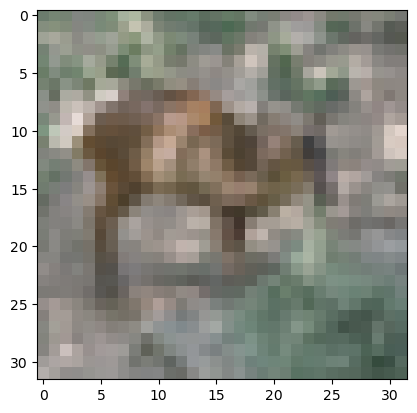

In [20]:
dataIdx = 1145
tmp_img = img_test[dataIdx]
tmp_label = label_test[dataIdx]

with torch.no_grad():
  prediction = network(tmp_img)

prediction_num = torch.argmax(prediction, 1)

print(prediction)
print(dataLabel[prediction_num])

plt.imshow(np.transpose(tmp_img,(1,2,0)))
plt.show